# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load Data

In [2]:
dataset = load_digits()

In [3]:
X, y = dataset['data'], dataset['target']

In [4]:
X.shape, y.shape

((1797, 64), (1797,))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [6]:
print([item.shape for item in (X_train, X_test, y_train, y_test)])

[(1347, 64), (450, 64), (1347,), (450,)]


# Preview

In [7]:
print(dataset.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [8]:
X_train[25]

array([ 0.,  0.,  3., 12., 16., 14.,  0.,  0.,  0.,  3., 15., 16., 15.,
       14.,  0.,  0.,  0.,  3., 12.,  1., 15.,  8.,  0.,  0.,  0.,  0.,
        0.,  9., 16.,  8.,  0.,  0.,  0.,  0.,  0., 10., 16., 16.,  8.,
        0.,  0.,  0.,  0.,  2.,  5., 13.,  8.,  0.,  0.,  0.,  2., 11.,
       11., 15.,  5.,  0.,  0.,  0.,  3., 16., 16.,  9.,  0.,  0.])

In [9]:
y_train

array([3, 1, 6, ..., 1, 1, 7])

# Preprocessing

In [10]:
X_train.shape

(1347, 64)

In [11]:
X_train, X_test = X_train.reshape(-1, 8, 8, 1), X_test.reshape(-1, 8, 8, 1)

In [12]:
X_train.shape, X_test.shape

((1347, 8, 8, 1), (450, 8, 8, 1))

In [13]:
X_train, X_test = X_train/16, X_test/16

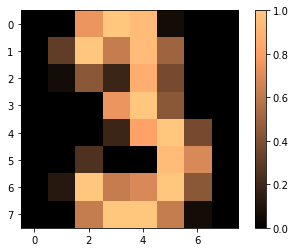

In [14]:
plt.imshow(X_train[0], cmap='copper')
plt.colorbar()

In [15]:
y_train, y_test = (tf.keras.utils.to_categorical(y) for y in (y_train, y_test))

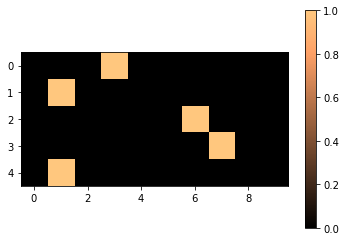

In [16]:
plt.imshow(y_train[:5], cmap='copper')
plt.colorbar()

# Model

In [17]:
input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

In [18]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    Flatten(), 
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax'),    
])

In [19]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 6, 6, 32)          320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1, 1, 64)          18496     
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [21]:
%%time
history = model.fit(X_train, y_train,
                    batch_size=64,
                    epochs=1000,
                    validation_split=0.2,
                    callbacks=[
                        EarlyStopping(monitor='val_accuracy', patience=20)
                    ])

Epoch 1/1000
17/17 [==============================] - 0s 25ms/step - loss: 2.2571 - accuracy: 0.2228 - val_loss: 2.1853 - val_accuracy: 0.5333
Epoch 2/1000
17/17 [==============================] - 0s 6ms/step - loss: 2.0786 - accuracy: 0.4011 - val_loss: 1.8829 - val_accuracy: 0.5148
Epoch 3/1000
17/17 [==============================] - 0s 6ms/step - loss: 1.7253 - accuracy: 0.5265 - val_loss: 1.3471 - val_accuracy: 0.7000
Epoch 4/1000
17/17 [==============================] - 0s 6ms/step - loss: 1.2460 - accuracy: 0.6462 - val_loss: 0.8657 - val_accuracy: 0.8222
Epoch 5/1000
17/17 [==============================] - 0s 6ms/step - loss: 0.9558 - accuracy: 0.6945 - val_loss: 0.6448 - val_accuracy: 0.8370
Epoch 6/1000
17/17 [==============================] - 0s 6ms/step - loss: 0.7645 - accuracy: 0.7567 - val_loss: 0.4516 - val_accuracy: 0.9111
Epoch 7/1000
17/17 [==============================] - 0s 6ms/step - loss: 0.6490 - accuracy: 0.8115 - val_loss: 0.3948 - val_accuracy: 0.8926
Epoch

<AxesSubplot:>

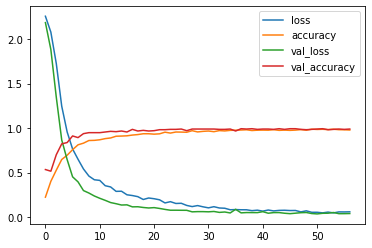

In [22]:
pd.DataFrame(history.history).plot()

# Evaluation

In [23]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=128)
print(f'Test loss: {test_loss:.6f}, Test acc: {test_accuracy:.2%}')

4/4 [==============================] - 0s 2ms/step - loss: 0.0639 - accuracy: 0.9867
Test loss: 0.063919, Test acc: 98.67%


In [24]:
y_test_pred = model.predict(X_test)

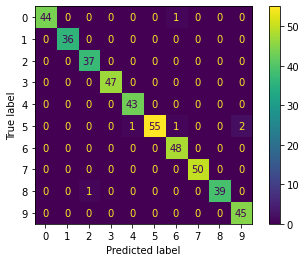

In [25]:
cmat = confusion_matrix(
    y_true=y_test.argmax(axis=1), 
    y_pred=y_test_pred.argmax(axis=1))
ConfusionMatrixDisplay(cmat).plot()

# Application

In [26]:
def application(idx=None):
    if not idx:
        idx = np.random.randint(len(X_test))
    print('Collected new features as follows:')
    plt.imshow(X_test[idx])
    plt.show()
    forecasted = model.predict(X_test[idx:idx+1]).argmax()
    actual = y_test[idx].argmax()
    print(f'\n{"CORRECT" if forecasted==actual else "WRONG"}')
    print(f'\nModel forecasted as {forecasted}')
    print(f'\nActual data should be {actual}')

Collected new features as follows:


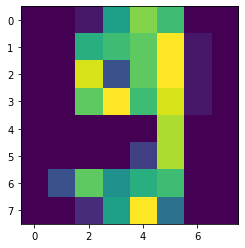


CORRECT

Model forecasted as 9

Actual data should be 9


In [27]:
application()